> # Time Series Forecasting And Portfolio Optimization (GMF) Investments

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore

> ## ♻️ Preprocess and Explore the Data

> > ##### Load, Prepare and understand the historical financial data for Tesla, BND, and SPY over the period from January 1, 2015, to  January 31, 2025., using YFinance

> ## ⏳ Data Loading

In [3]:
from scripts.data_loader import loadData
tsla_data, bnd_data, spy_data = loadData()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> ## ✅ Check Loaded Dataset

In [4]:
from scripts.data_loader import format_date

data = format_date

> ## 🛢️ TSLA Datasets

In [5]:
rows, columns = tsla_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [6]:
tsla_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2025-01-24,414.450012,418.880005,405.779999,406.579987,406.579987,56427100
2025-01-27,394.799988,406.690002,389.000000,397.149994,397.149994,58125500


In [7]:
tsla_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,117.877662,120.474827,115.097514,117.848209,117.848209,1.120308e+08
std,116.611575,119.236025,113.698930,116.508288,116.508288,7.387509e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,17.259334,17.527667,16.942000,17.228000,17.228000,6.680295e+07
50%,31.299999,32.329334,29.760000,30.298000,30.298000,9.264180e+07
75%,222.653336,226.696671,217.061661,221.525002,221.525002,1.294283e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


In [8]:
tsla_data.dtypes


Price      Ticker
Open       TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Close      TSLA      float64
Adj Close            float64
Volume     TSLA        int64
dtype: object

In [9]:
tsla_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, TSLA)    2535 non-null   float64
 1   (High, TSLA)    2535 non-null   float64
 2   (Low, TSLA)     2535 non-null   float64
 3   (Close, TSLA)   2535 non-null   float64
 4   (Adj Close, )   2535 non-null   float64
 5   (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


> ## 🛢️ BND Dataset

In [10]:
rows, columns = bnd_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [11]:
bnd_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
Date,,,,,,
2015-01-02,62.406560,62.603404,62.398988,62.573120,62.573120,2218800
2015-01-05,62.641269,62.777545,62.610985,62.754833,62.754833,5820100
2015-01-06,62.860820,63.125799,62.860820,62.936527,62.936527,3887600
2015-01-07,62.944096,63.050088,62.875961,62.974380,62.974380,2433400
2015-01-08,62.921404,62.921404,62.815412,62.875980,62.875980,1873400
...,...,...,...,...,...,...
2025-01-24,71.766106,71.855810,71.636531,71.805977,71.805977,5555700
2025-01-27,72.104996,72.204677,72.025262,72.184738,72.184738,8621200


In [12]:
bnd_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,69.293224,69.391260,69.186011,69.289450,69.289450,4.233200e+06
std,4.793198,4.800407,4.782141,4.792145,4.792145,2.796083e+06
min,61.891480,61.937399,61.822647,61.860886,61.860886,0.000000e+00
25%,65.552731,65.630184,65.475498,65.565285,65.565285,2.057700e+06
50%,68.310219,68.457869,68.169763,68.329132,68.329132,3.805800e+06
75%,72.845708,72.946425,72.728794,72.879932,72.879932,5.626700e+06
max,78.884950,78.920180,78.788059,78.823296,78.823296,3.193720e+07


In [13]:
bnd_data.dtypes

Price      Ticker
Open       BND       float64
High       BND       float64
Low        BND       float64
Close      BND       float64
Adj Close            float64
Volume     BND         int64
dtype: object

In [14]:
bnd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, BND)    2535 non-null   float64
 1   (High, BND)    2535 non-null   float64
 2   (Low, BND)     2535 non-null   float64
 3   (Close, BND)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, BND)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


> ## 🛢️ SPY Datasets

In [15]:
rows, columns = spy_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 2535
Number of columns: 6


In [16]:
spy_data.head(rows)


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
Date,,,,,,
2015-01-02,173.391006,173.811083,171.542657,172.592850,172.592850,121465900
2015-01-05,171.534312,171.702341,169.165084,169.475937,169.475937,169632600
2015-01-06,169.786749,170.316050,167.073055,167.879608,167.879608,209151400
2015-01-07,169.223897,170.316100,168.770219,169.971634,169.971634,125346700
2015-01-08,171.399826,173.206165,171.383032,172.987717,172.987717,147217800
...,...,...,...,...,...,...
2025-01-24,609.809998,610.780029,606.799988,607.969971,607.969971,34604700
2025-01-27,594.809998,599.690002,594.640015,599.369995,599.369995,70361100


In [17]:
spy_data.describe()


Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,316.021383,317.725659,314.157888,316.067401,316.067401,8.714655e+07
std,117.921619,118.486411,117.269903,117.926911,117.926911,4.487253e+07
min,156.354943,157.864136,154.676912,156.800842,156.800842,2.027000e+07
25%,214.972507,215.702215,214.206923,214.841949,214.841949,5.862005e+07
50%,277.230842,277.919488,276.073612,277.117889,277.117889,7.642870e+07
75%,406.100271,409.134341,402.830858,405.869186,405.869186,1.018866e+08
max,609.809998,610.780029,606.799988,609.750000,609.750000,5.072443e+08


In [18]:
spy_data.dtypes


Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

In [19]:
spy_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, SPY)    2535 non-null   float64
 1   (High, SPY)    2535 non-null   float64
 2   (Low, SPY)     2535 non-null   float64
 3   (Close, SPY)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, SPY)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [20]:
spy_data.dtypes

Price      Ticker
Open       SPY       float64
High       SPY       float64
Low        SPY       float64
Close      SPY       float64
Adj Close            float64
Volume     SPY         int64
dtype: object

>>> ### ⚠️ Check missing values

In [21]:
from scripts.data_cleaning import preprocess_data
tsla_data = preprocess_data(tsla_data,"TSLA")
bnd_data = preprocess_data(bnd_data,"BND")
spy_data = preprocess_data(spy_data,"SPY")

TSLA Missing values:
Price      Ticker
Open       TSLA      0
High       TSLA      0
Low        TSLA      0
Close      TSLA      0
Adj Close            0
Volume     TSLA      0
dtype: int64
BND Missing values:
Price      Ticker
Open       BND       0
High       BND       0
Low        BND       0
Close      BND       0
Adj Close            0
Volume     BND       0
dtype: int64
SPY Missing values:
Price      Ticker
Open       SPY       0
High       SPY       0
Low        SPY       0
Close      SPY       0
Adj Close            0
Volume     SPY       0
dtype: int64


> ## 🚀 Exploratory Data Analysis (EDA) and Outlier Detection

In [22]:
from scripts.plots import*

> ### 💵 Close Price Over Time

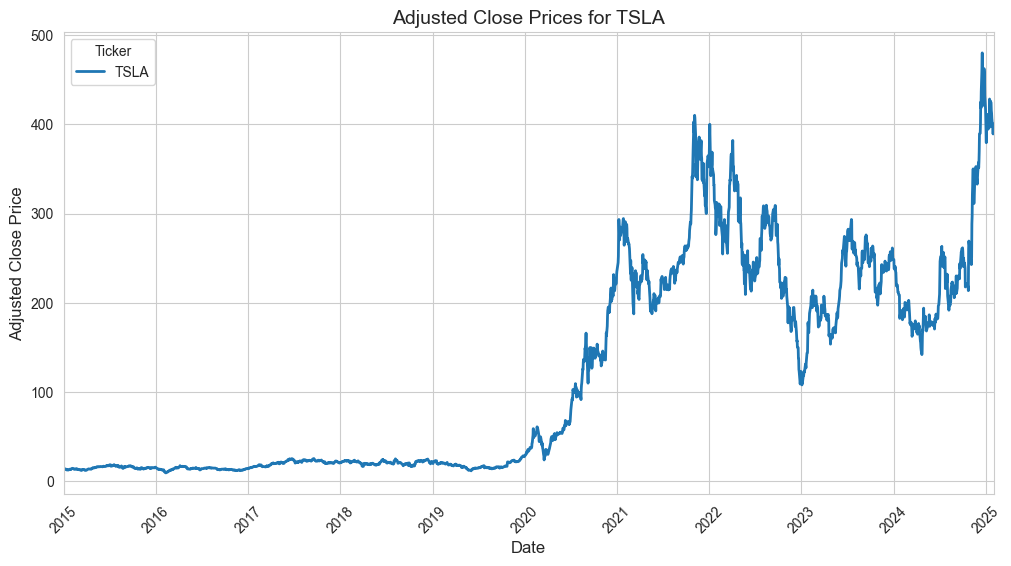

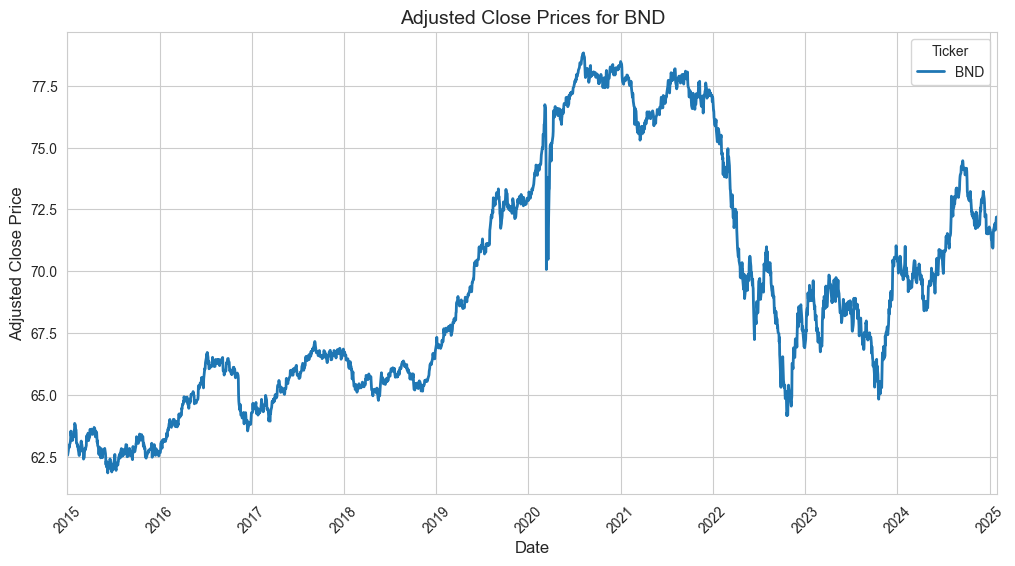

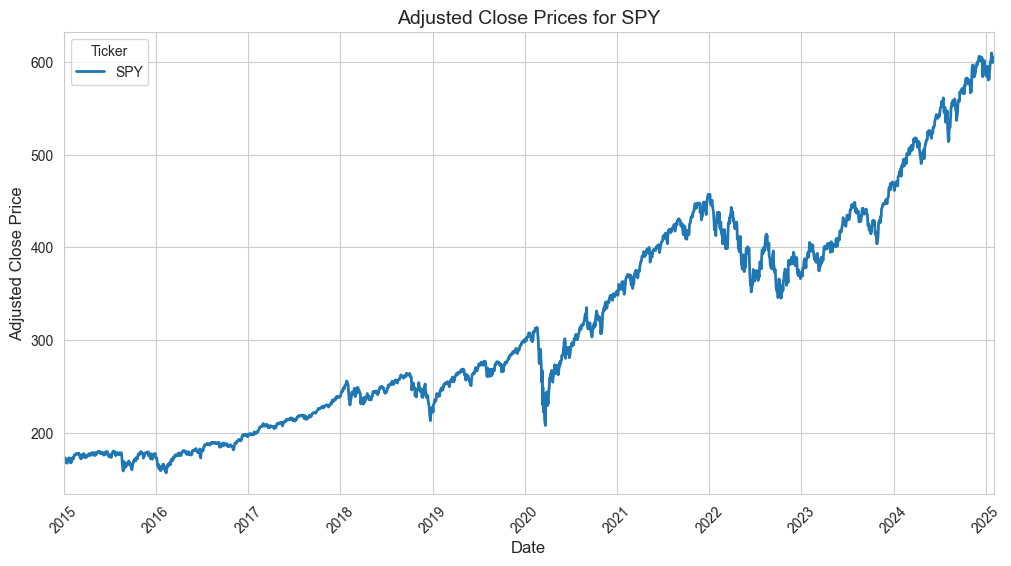

In [23]:
closePriceOverTime([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

> ### 🗓️ Daily Return

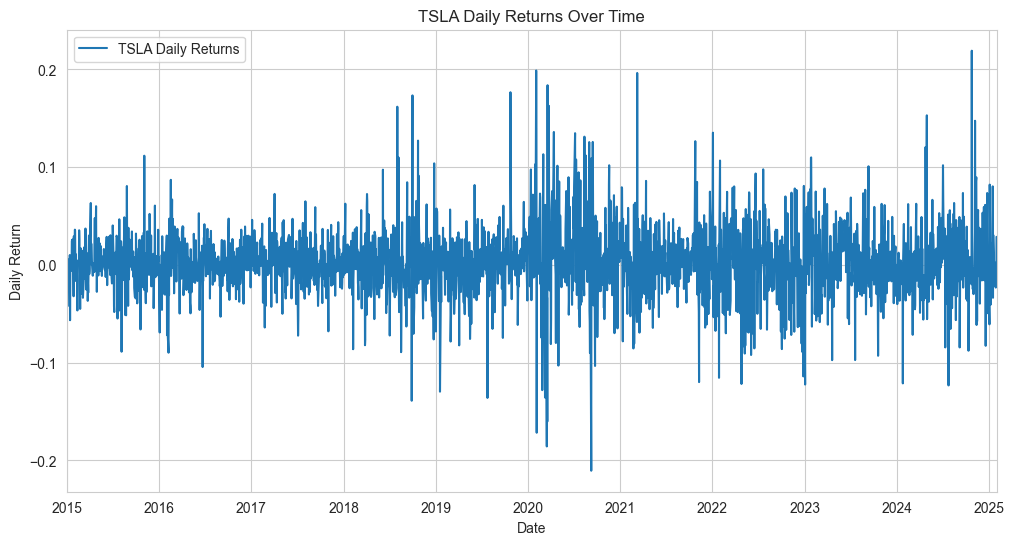

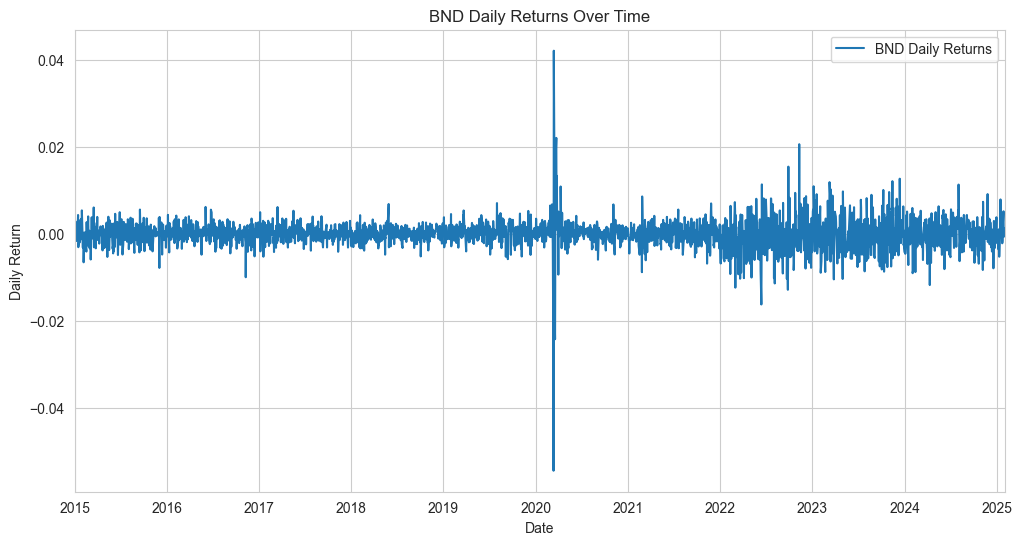

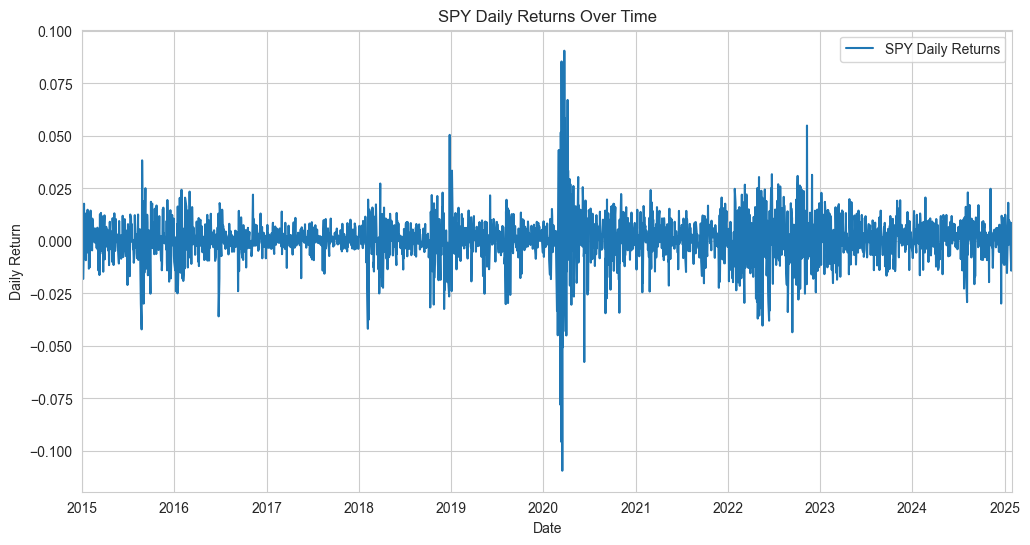

In [24]:
dailyReturn([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Volatility with shaded volatility range

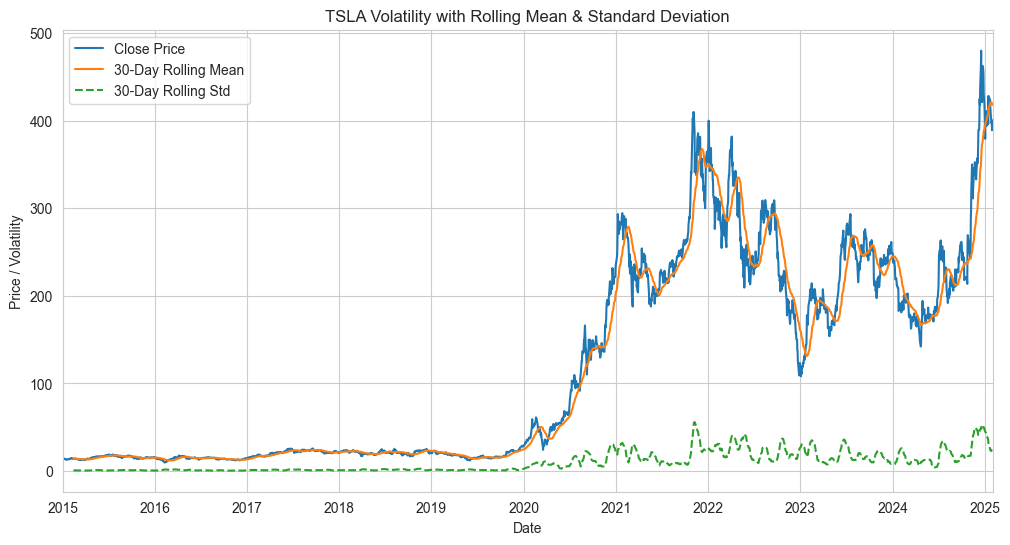

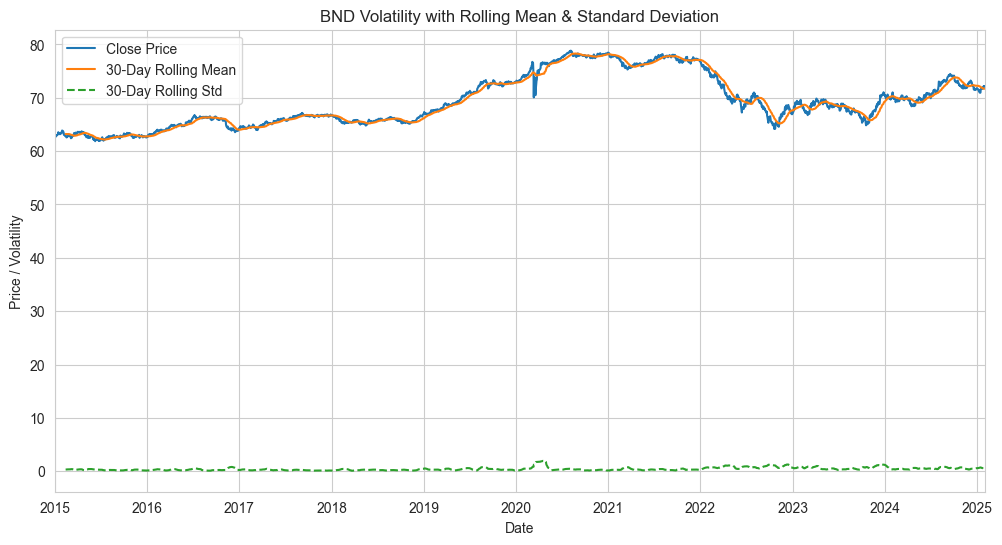

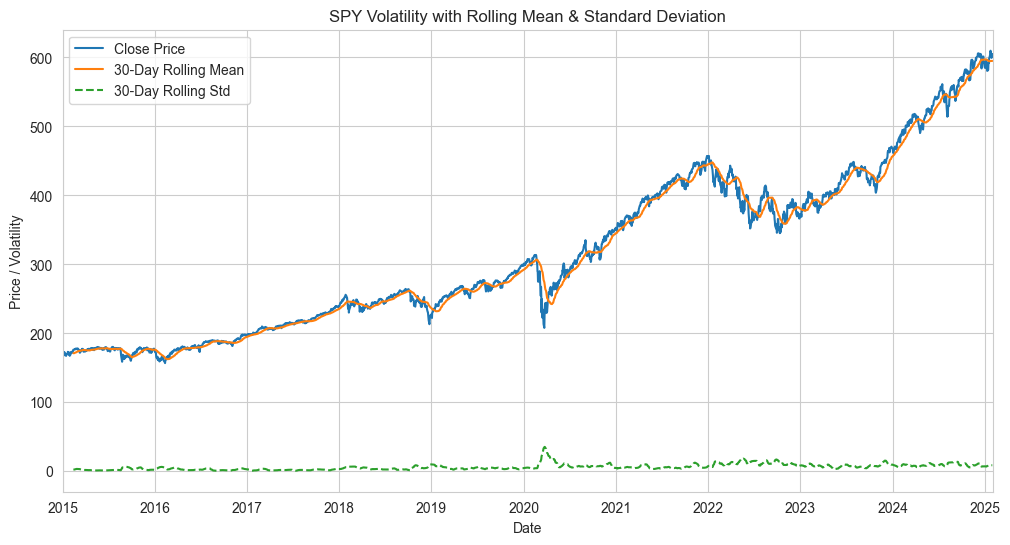

In [25]:
rollingAvgAndStd([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Outliers

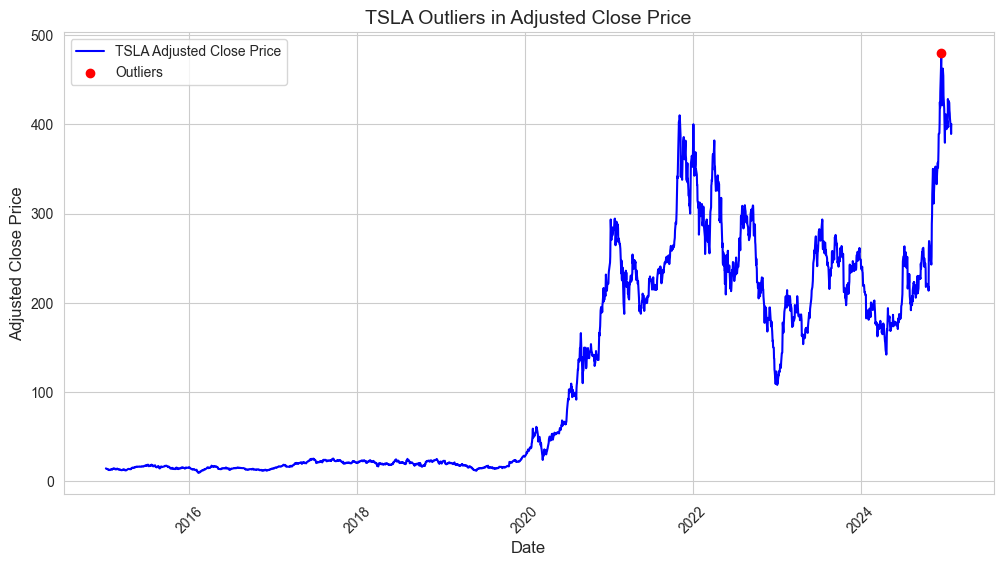


Outliers for TSLA:
                 Price   Z-Score Ticker
Date                                   
2024-12-17  479.859985  3.107176   TSLA


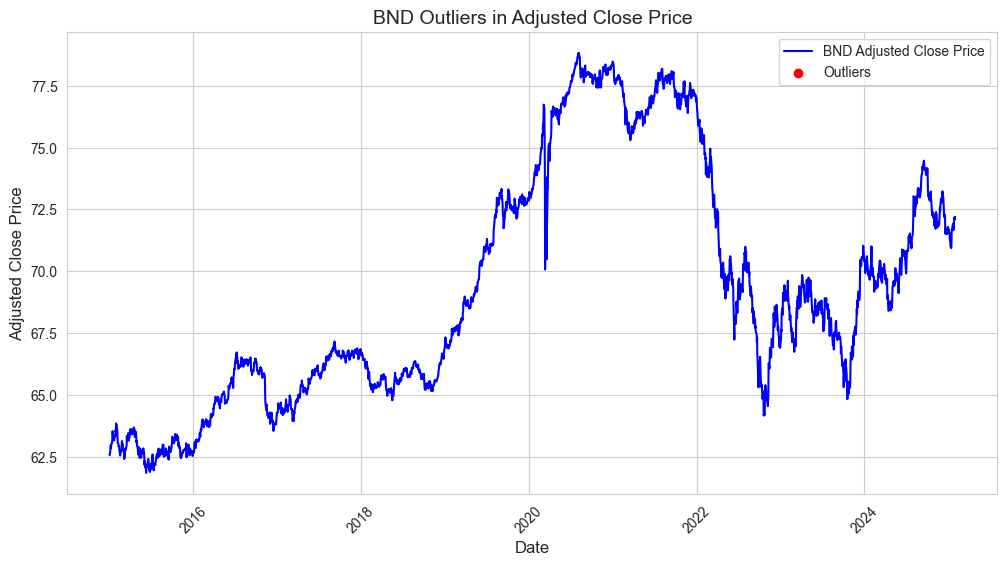


Outliers for BND:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


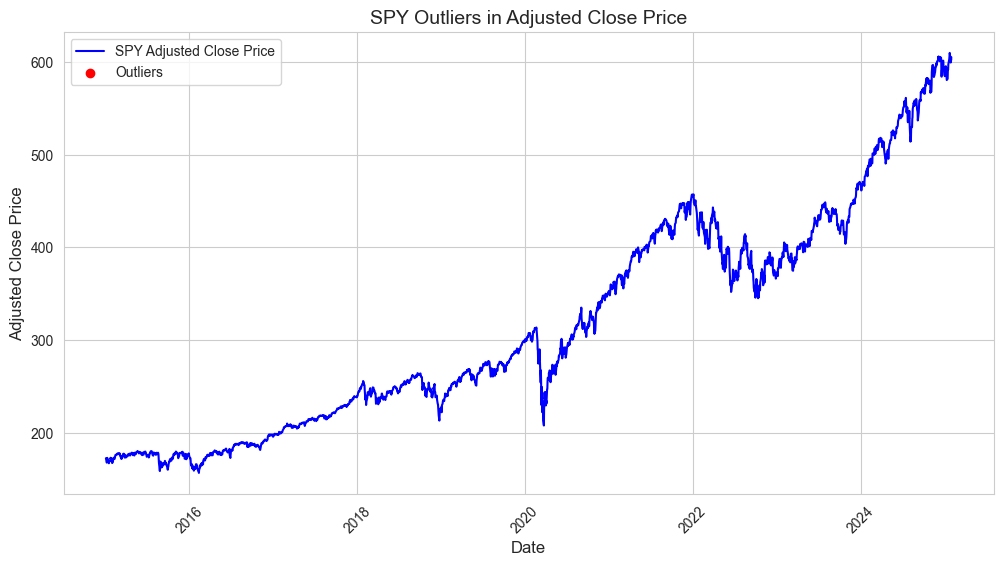


Outliers for SPY:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


In [26]:
detect_outliers([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

>> ### Remove Outlier

In [27]:
cleaned_tsla, cleaned_bnd, cleaned_spy = remove_outliers([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])



Removed Outliers for TSLA:
Price        Adj Close   Z-Score
Ticker                          
Date                            
2024-12-17  479.859985  3.107176

Removed Outliers for BND:
No outliers found.

Removed Outliers for SPY:
No outliers found.


In [28]:
print(cleaned_tsla.loc['2024-12-17'] if '2024-12-17' in cleaned_tsla.index else "Outlier removed!")


Outlier removed!


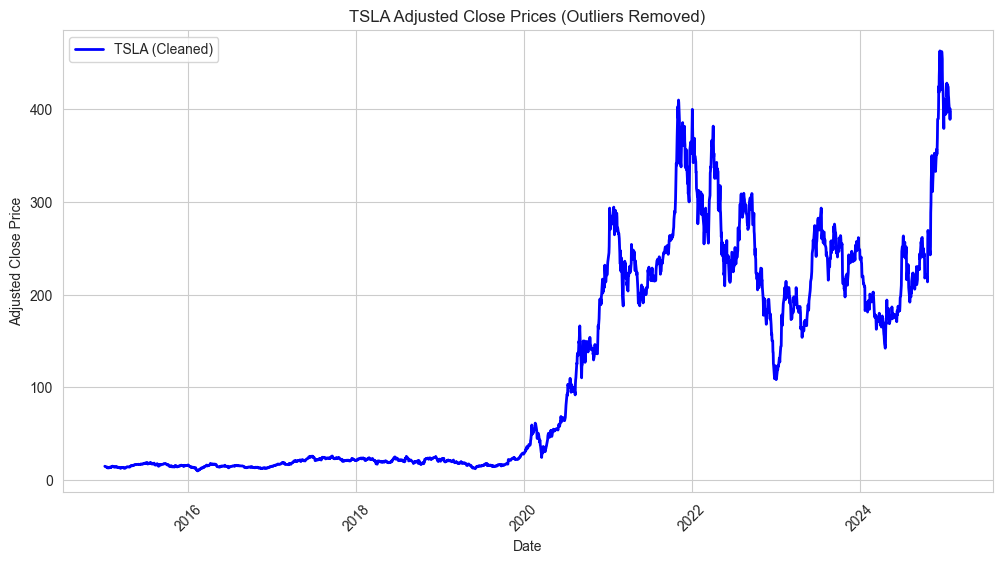

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_tsla.index, cleaned_tsla['Adj Close'], label="TSLA (Cleaned)", linewidth=2, color="blue")
plt.title("TSLA Adjusted Close Prices (Outliers Removed)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [30]:
from scripts.plots import calc_daily_return
calc_daily_return

<function scripts.plots.calc_daily_return(stockData, tickers)>

>>> ### Daily Percentage Change

In [31]:
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  # Convert to percentage


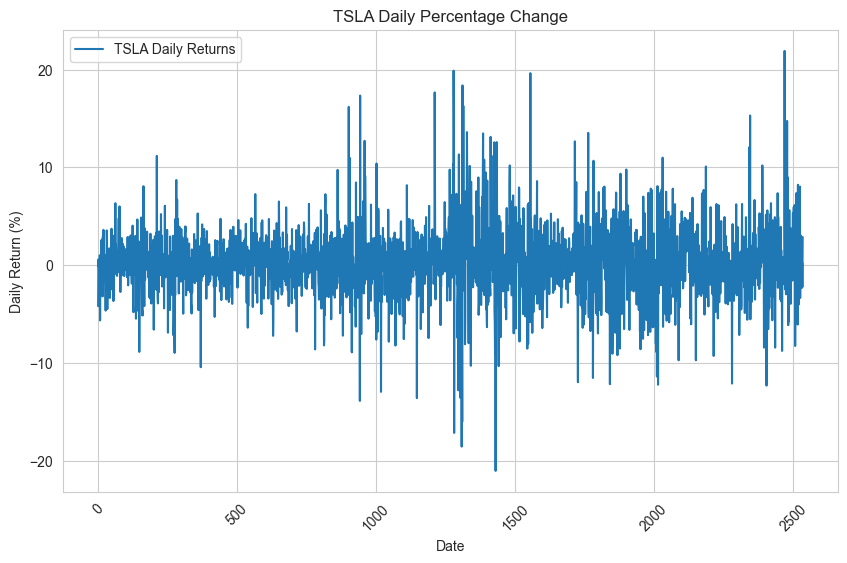

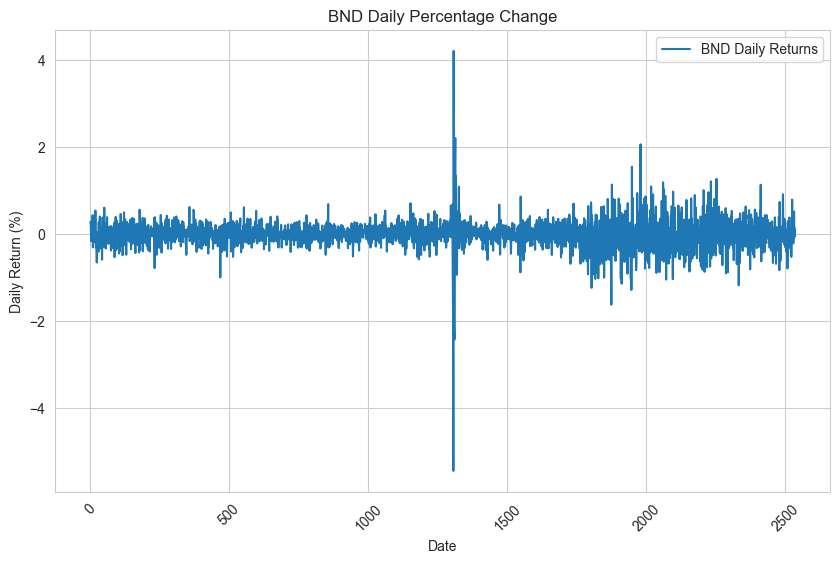

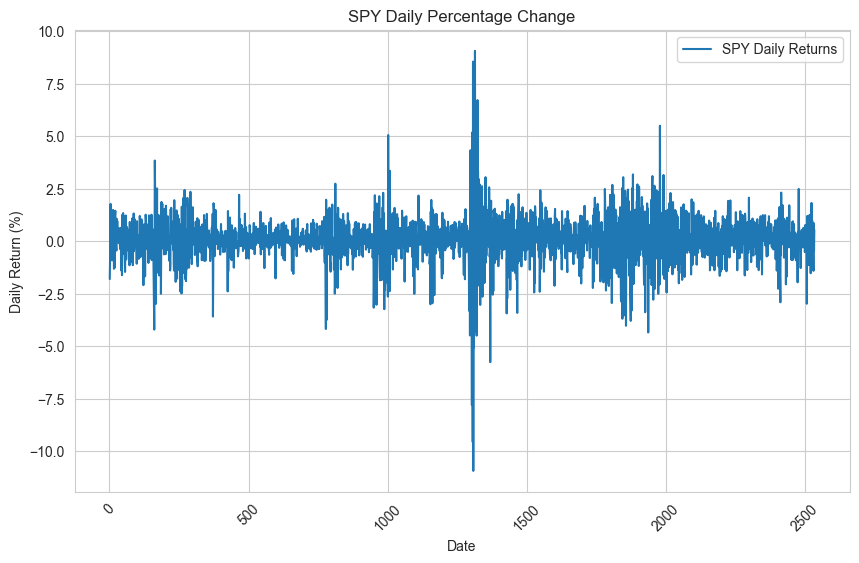

In [32]:
plot_daily_percentage([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


>> ## Unusual High/Low Returns

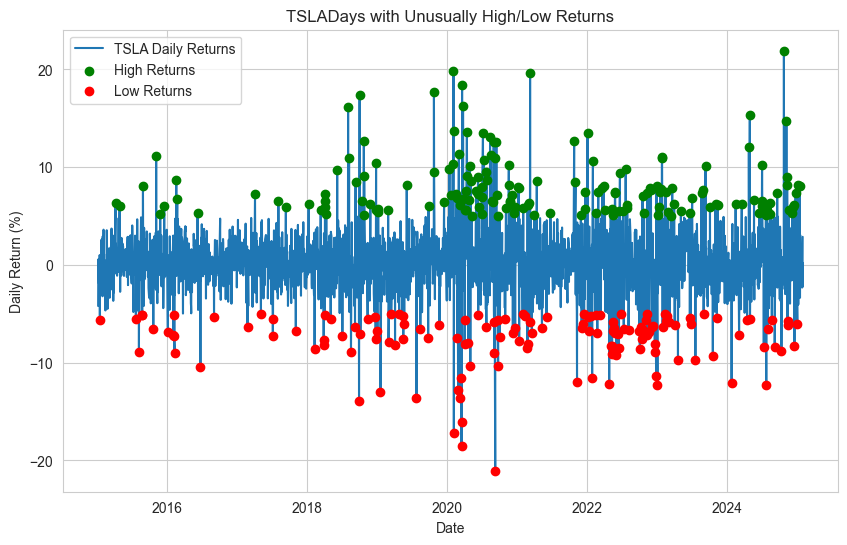

TSLAHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-04-06     6.335084
2015-04-27     6.006504
2015-08-27     8.072407
2015-11-04    11.173506
2015-11-25     5.218781
...                 ...
2024-12-11     5.930322
2024-12-16     6.141251
2024-12-24     7.357174
2025-01-03     8.215567
2025-01-15     8.038151

[169 rows x 1 columns]


TSLALow Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-01-14    -5.659734
2015-07-21    -5.487851
2015-08-06    -8.884613
2015-08-20    -5.120475
2015-08-24    -5.156654
...                 ...
2024-10-11    -8.782511
2024-11-12    -6.145717
2024-11-14    -5.771560
2024-12-18    -8.279494
2025-01-02    -6.081616

[142 rows x 1 columns]




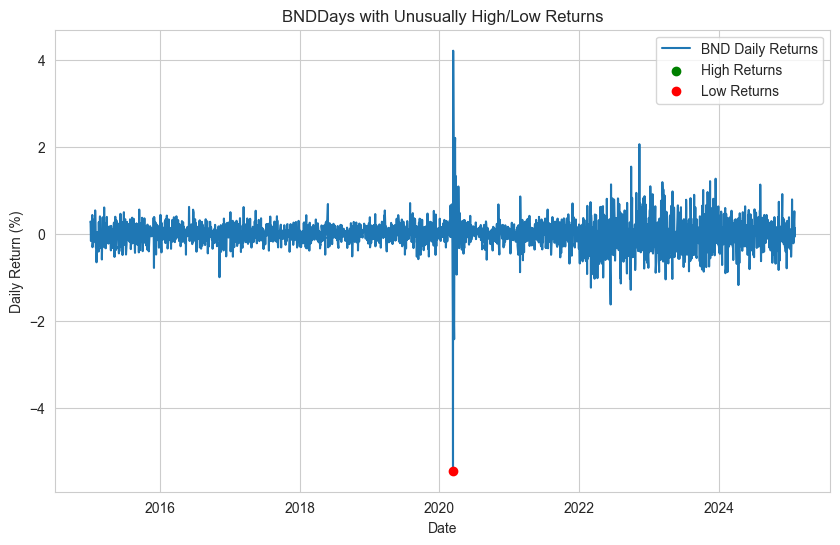

BNDHigh Returns for:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


BNDLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-12    -5.438553




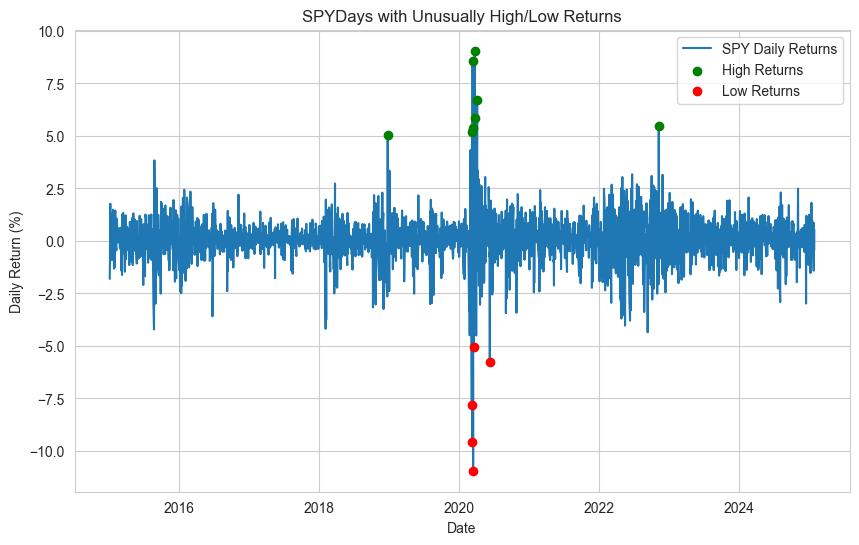

SPYHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2018-12-26     5.052485
2020-03-10     5.174490
2020-03-13     8.548633
2020-03-17     5.399220
2020-03-24     9.060345
2020-03-26     5.838976
2020-04-06     6.716623
2022-11-10     5.495398


SPYLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-09    -7.809441
2020-03-12    -9.567728
2020-03-16   -10.942397
2020-03-18    -5.063276
2020-06-11    -5.764904




In [33]:
# Ensure 'Daily Return' exists and 'Date' is the index
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100  
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

# Call the function
plot_significant_anomalies([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


> ### ❄ Time Series Decomposition

>> ## Seasonality and Trends

<Figure size 1200x600 with 0 Axes>

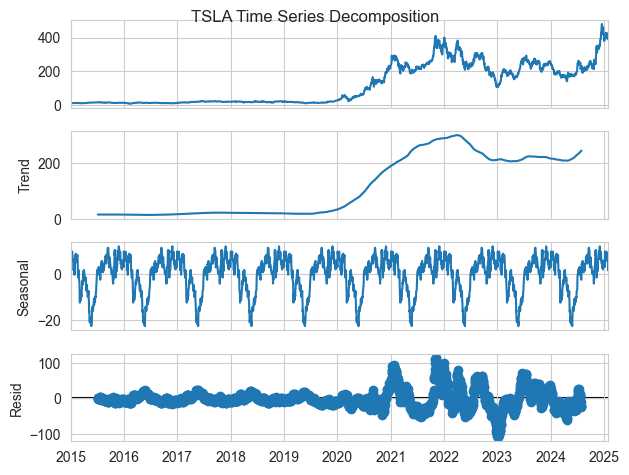

<Figure size 1200x600 with 0 Axes>

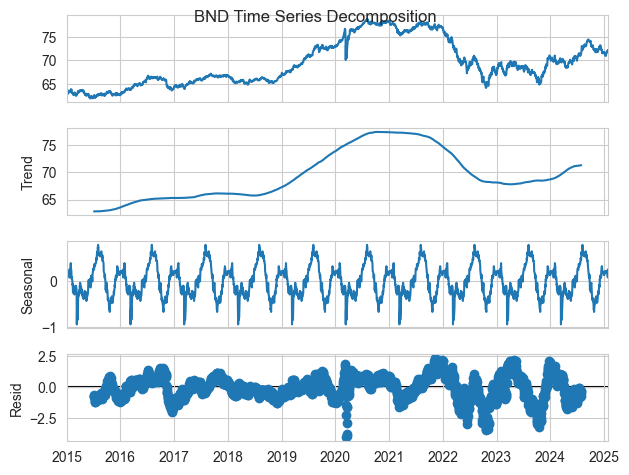

<Figure size 1200x600 with 0 Axes>

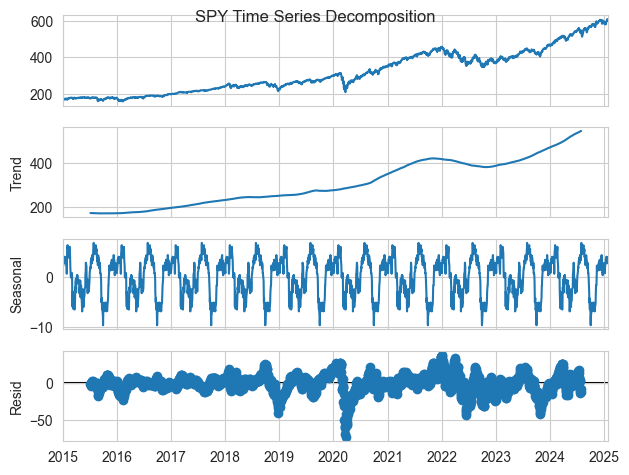

In [34]:
timeSeriesDecomposition([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

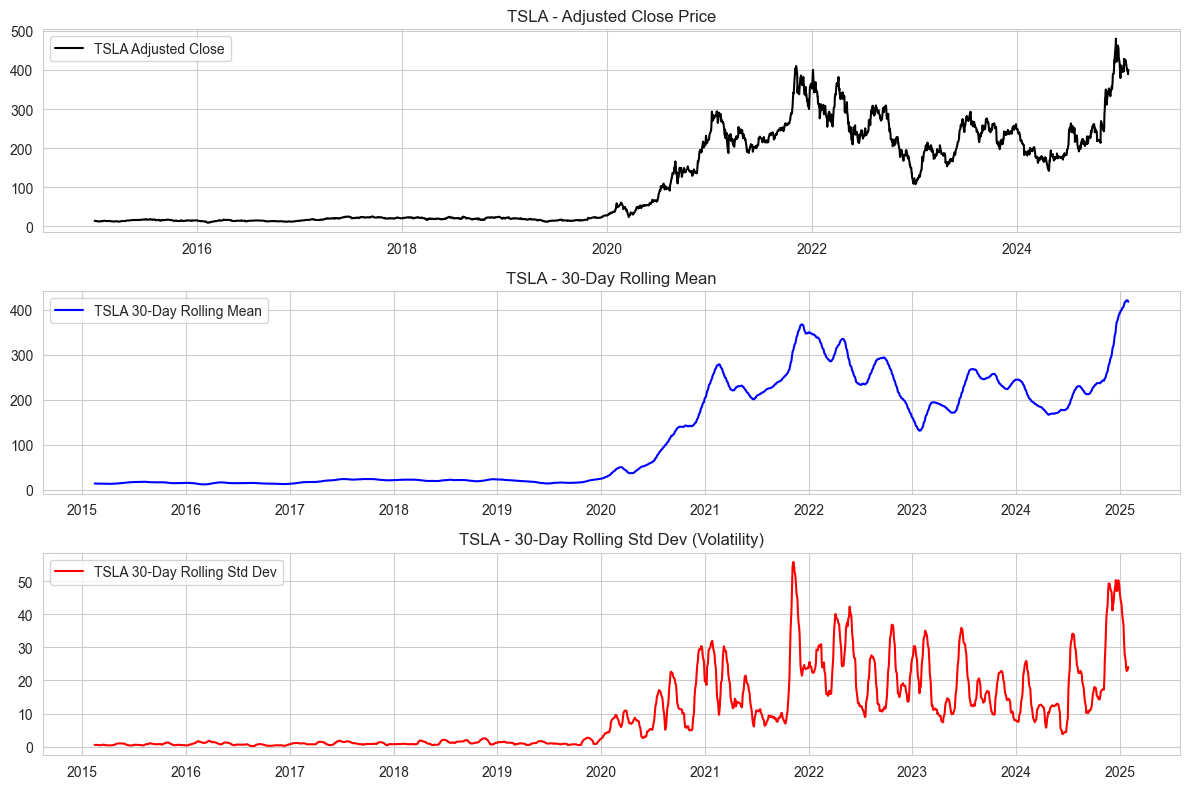

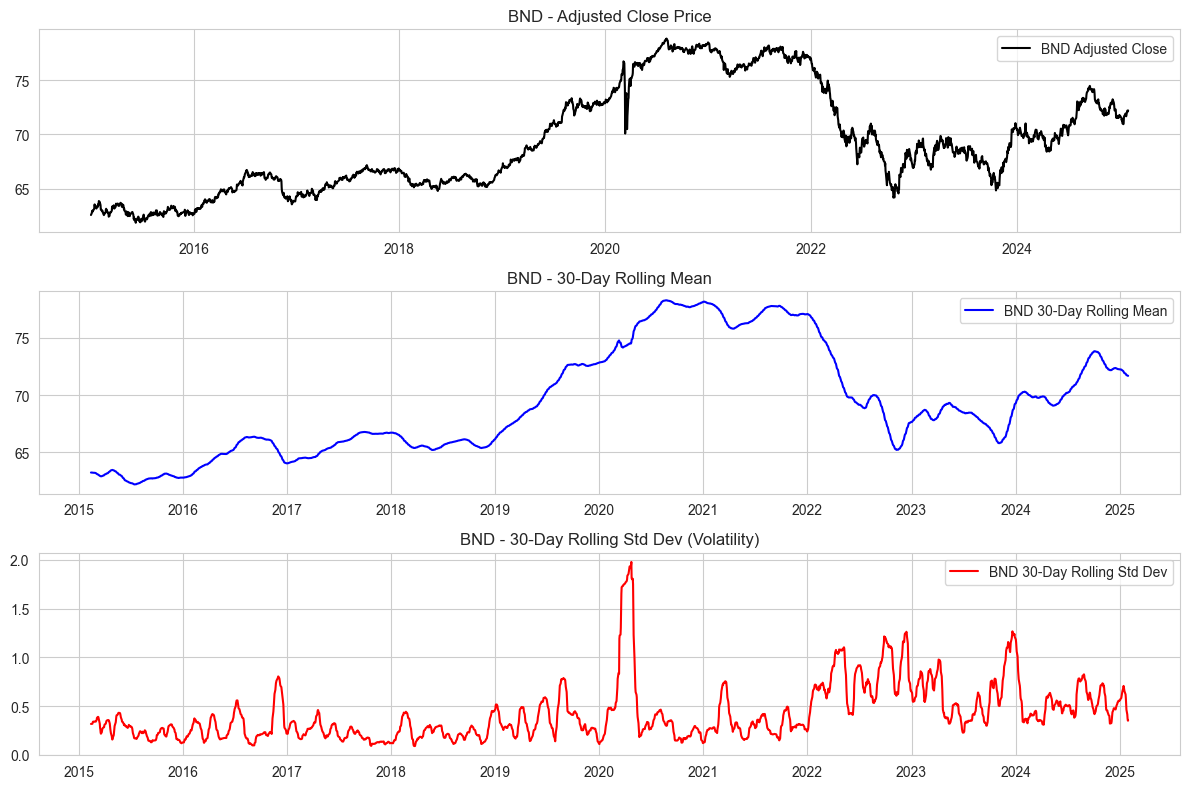

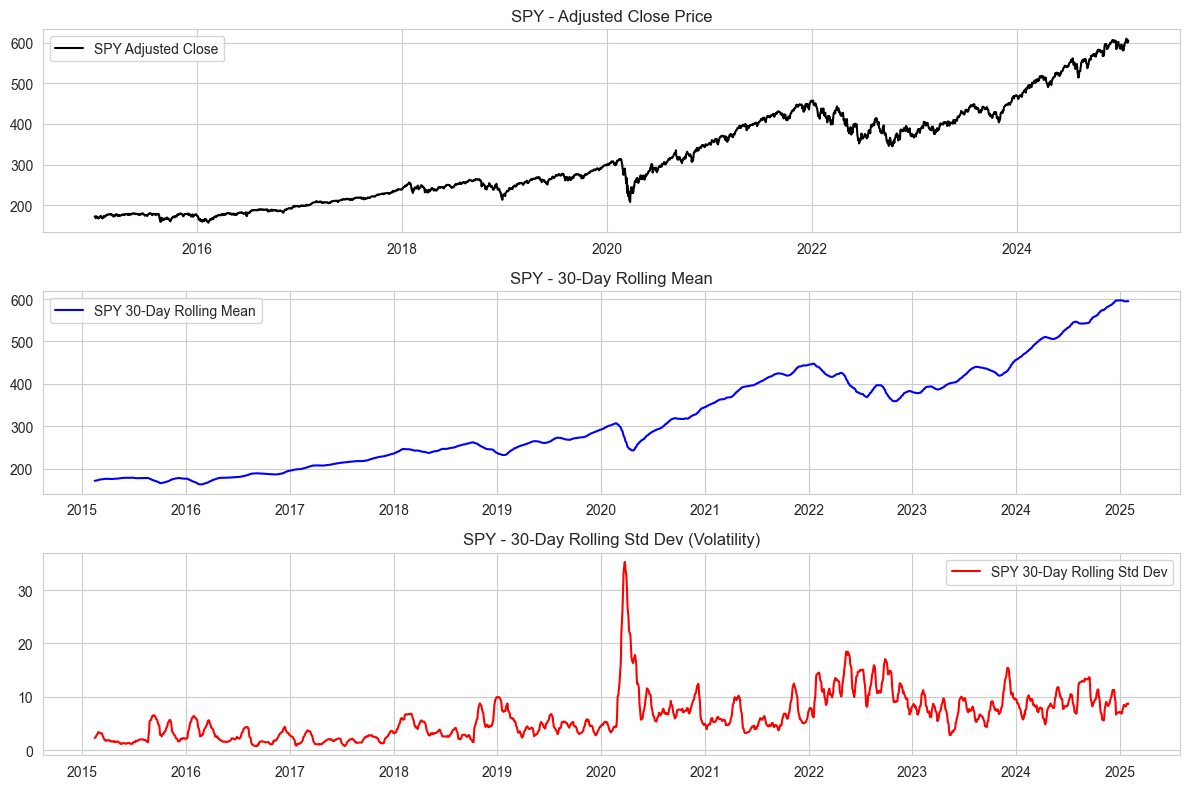

In [35]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size, [tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


> ### ❗Value at Risk(VaR) and Sharpe Ratio

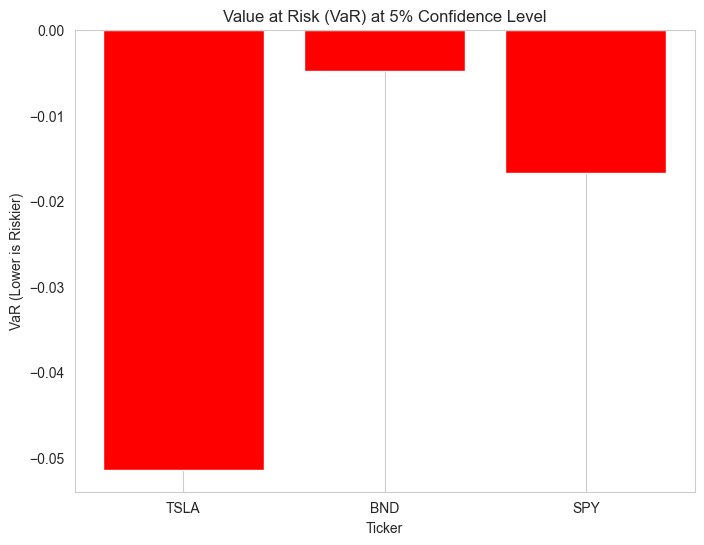

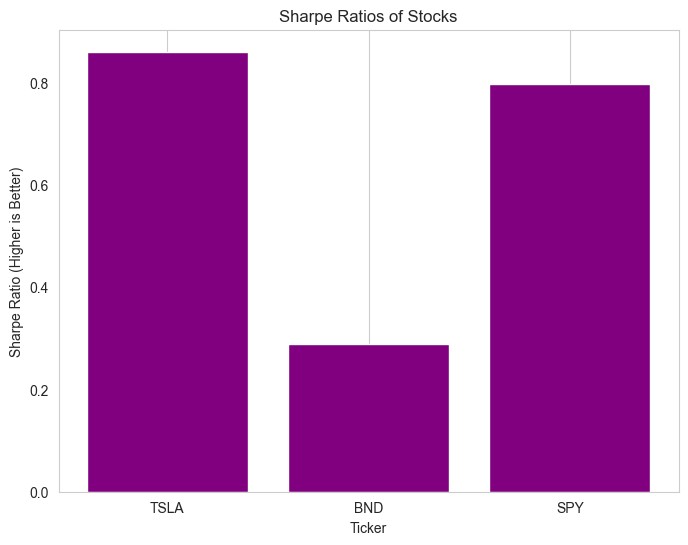


Value at Risk (VaR) at 5% Confidence Level:
TSLA: -0.0514
BND: -0.0048
SPY: -0.0167

Sharpe Ratios:
TSLA: 0.8607
BND: 0.2890
SPY: 0.7975


In [36]:
varAndSharpeRatio([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])


> # Develop Time Series Forecasting Models

### This task involves building a time series forecasting model to predict Tesla's future stock prices. You will choose from classical statistical models like ARIMA and SARIMA, or deep learning models like LSTM.
        - Step 1: Load and Prepare the Data
        - Step 2: Split the Data
               - 80% of the data for training and 20% for testing.
        - Step 3: Choose and Train the Model
        - step 4: Evaluate the Model Performance using MAE,RMSE,MAPE
        - Step 5: Optimize Model Parameters
                  - using auto_arima from pmdarima
                  - Hyperparameter Tuning for LSTM: using epochs, and batch sizes to find the optimal configuration
        - Step 6: Forecast Future Prices
                 - Make Predictions using the final chosen model 


Running forecasting for Tesla (TSLA)...


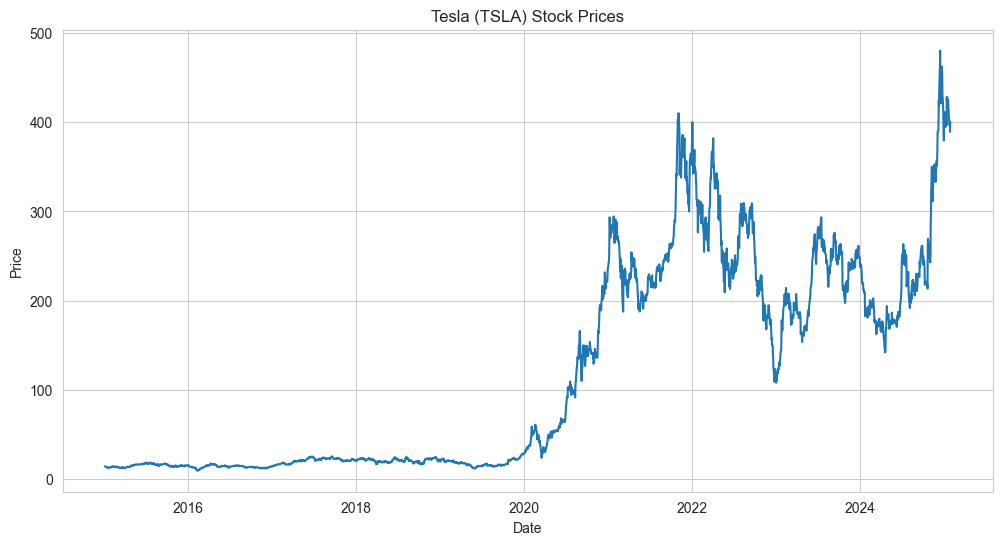

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0397
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0014
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0012
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0012
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.4919e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.4569e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 7.7776e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 7.8397e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.2271e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 7.3418e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Tesla (TSLA) - ARIMA - MAE: 66.20274980333116, RMSE: 75.4063207759742, MAPE: 29.518710980115316
Tesla (TSLA) - SARIMA - MAE: 54.922857263469204, RMSE: 66.29209008813972, MAPE: 24.039078461288103
Tesla (TSLA) - LSTM - MAE: 10.415135616726346, RMSE: 13.02126015982047, MAPE: 20

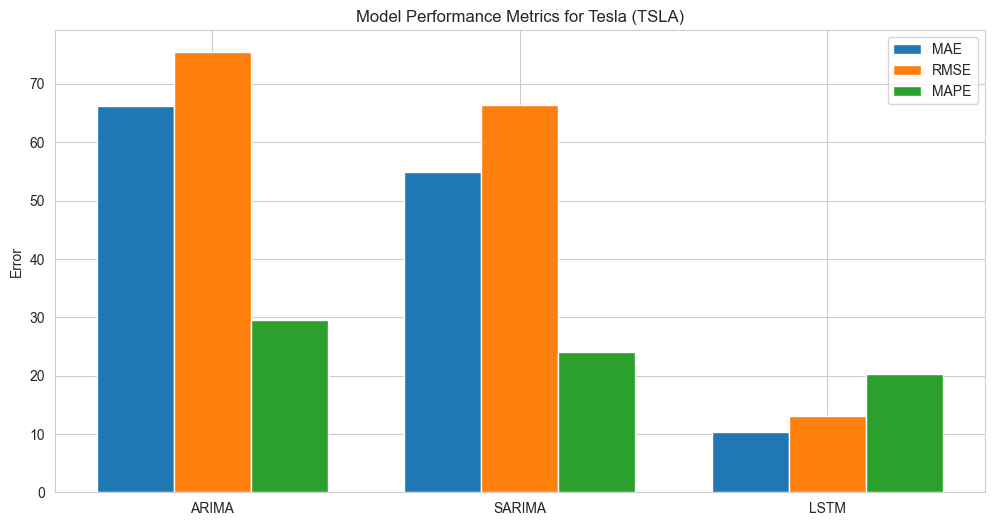

In [37]:
# Run forecasting for Tesla
from scripts.features import*
# results_tesla = run_forecasting(['tesla']['Close'], 'Tesla (TSLA)',seasonal_order=(1, 1, 1, 12))
results_tesla = run_forecasting(tsla_data['Close'], 'Tesla (TSLA)', seasonal_order=(1, 1, 1, 12))



Running forecasting for Vanguard Total Bond Market ETF (BND)...


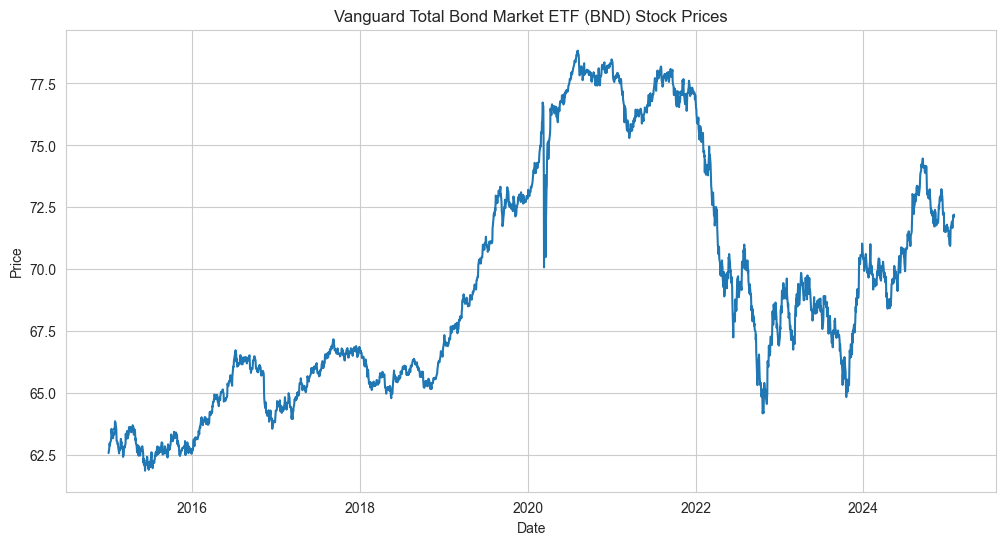

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/10


d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0495
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.9021e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0010
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 8.5270e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.4472e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.2149e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.2628e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 8.2857e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.7614e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.5372e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Vanguard Total Bond Market ETF (BND) - ARIMA - MAE: 1.0821416364776233, RMSE: 1.3722748714366455, MAPE: 1.5900337442678572
Vanguard Total Bond Market ETF (BND) - SARIMA - MAE: 1.2627043270739933, RMSE: 1.5330915949018435, MAPE: 1.7314165074318169
Vanguard Total Bond Market ETF 

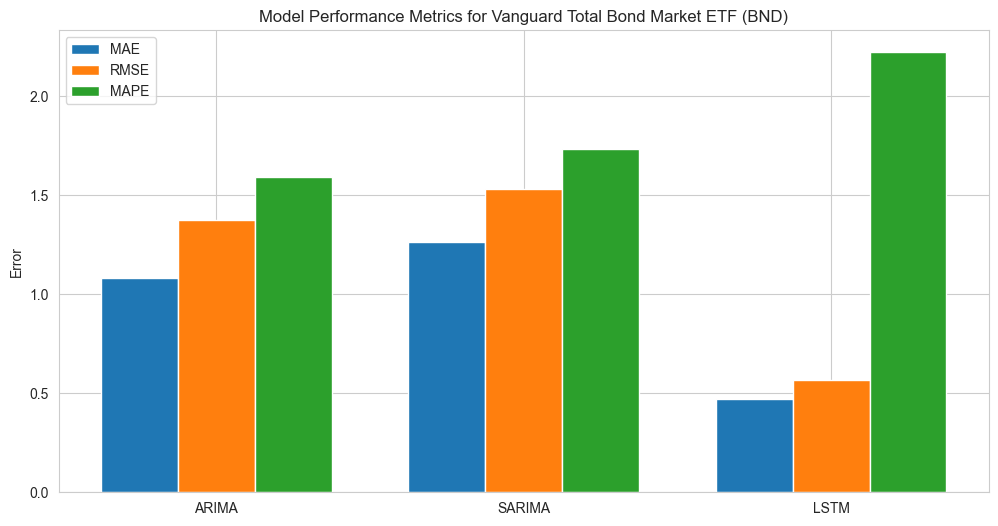

In [38]:
# Run forecasting for Vanguard Total Bond Market ETF
result_bond = run_forecasting(bnd_data['Close'],  'Vanguard Total Bond Market ETF (BND)',seasonal_order=(1, 1, 1, 12))


Running forecasting for SPDR S&P 500 ETF Trust (SPY)...


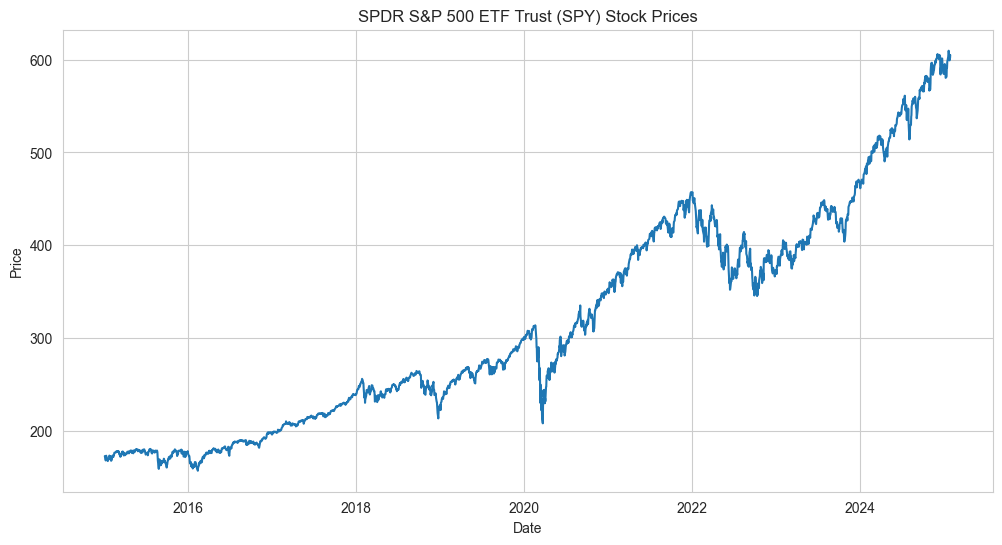

d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/10


d:\Week-11\Time-Series-Forecasting-for-Portfolio-Management-Optimization\.week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0441
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 8.1556e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.0156e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.5125e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 6.1070e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.3919e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.7125e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.4308e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.3912e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.0811e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
SPDR S&P 500 ETF Trust (SPY) - ARIMA - MAE: 42.031406722221, RMSE: 54.05444343914228, MAPE: 10.005961854591552
SPDR S&P 500 ETF Trust (SPY) - SARIMA - MAE: 42.672415793880916, RMSE: 54.65166083469146, MAPE: 10.091279640147452
SPDR S&P 500 ETF Trust (SPY) - LSTM - MAE: 10.22

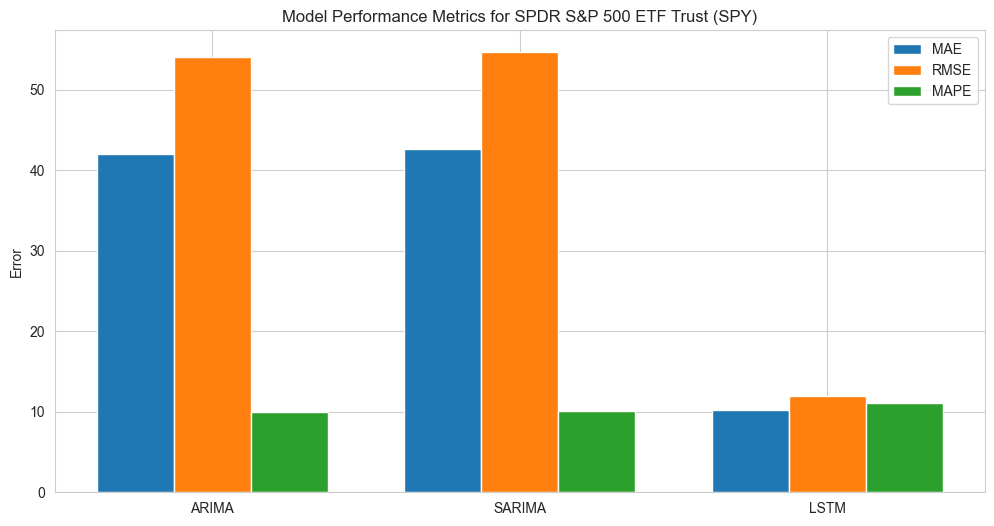

In [39]:
# Run forecasting for SPDR S&P 500 ETF Trust
result_spy = run_forecasting(spy_data['Close'], 'SPDR S&P 500 ETF Trust (SPY)',seasonal_order=(1, 1, 1, 12))


> # 📊 Forecast Future Market Trends

### This task focuses on using the trained model from Task 2 to predict Tesla's future stock prices for 6-12 months. We will analyze the forecast results, visualize trends, assess risks, and provide insights.
          - Step 1: Load the Trained Model
          - Step 2: Generate Future Forecasts
          - Step 3: Visualize the Forecast
          - Step 4: Include Confidence Intervals
          - Step 5: Interpret the Results
          - Step 6: Identify Market Opportunities and Risks

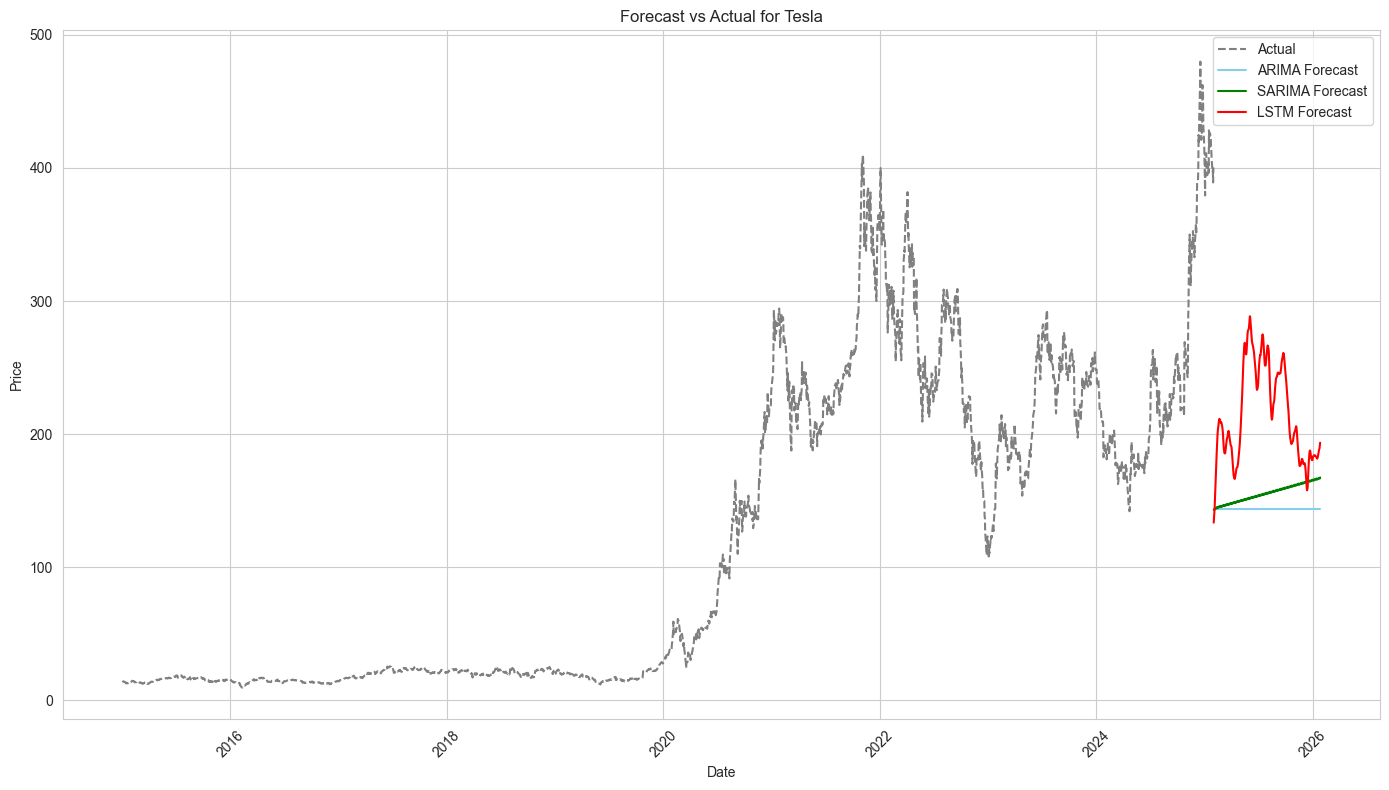


Summary of Model Performance for Tesla:
ARIMA - MAE: 66.2027, RMSE: 75.4063, MAPE: 29.52%
SARIMA - MAE: 54.9229, RMSE: 66.2921, MAPE: 24.04%
LSTM - MAE: 10.4151, RMSE: 13.0213, MAPE: 20.28%

Best Model for Tesla based on MAPE: LSTM



In [40]:

forecast(tsla_data, results_tesla,'Tesla')

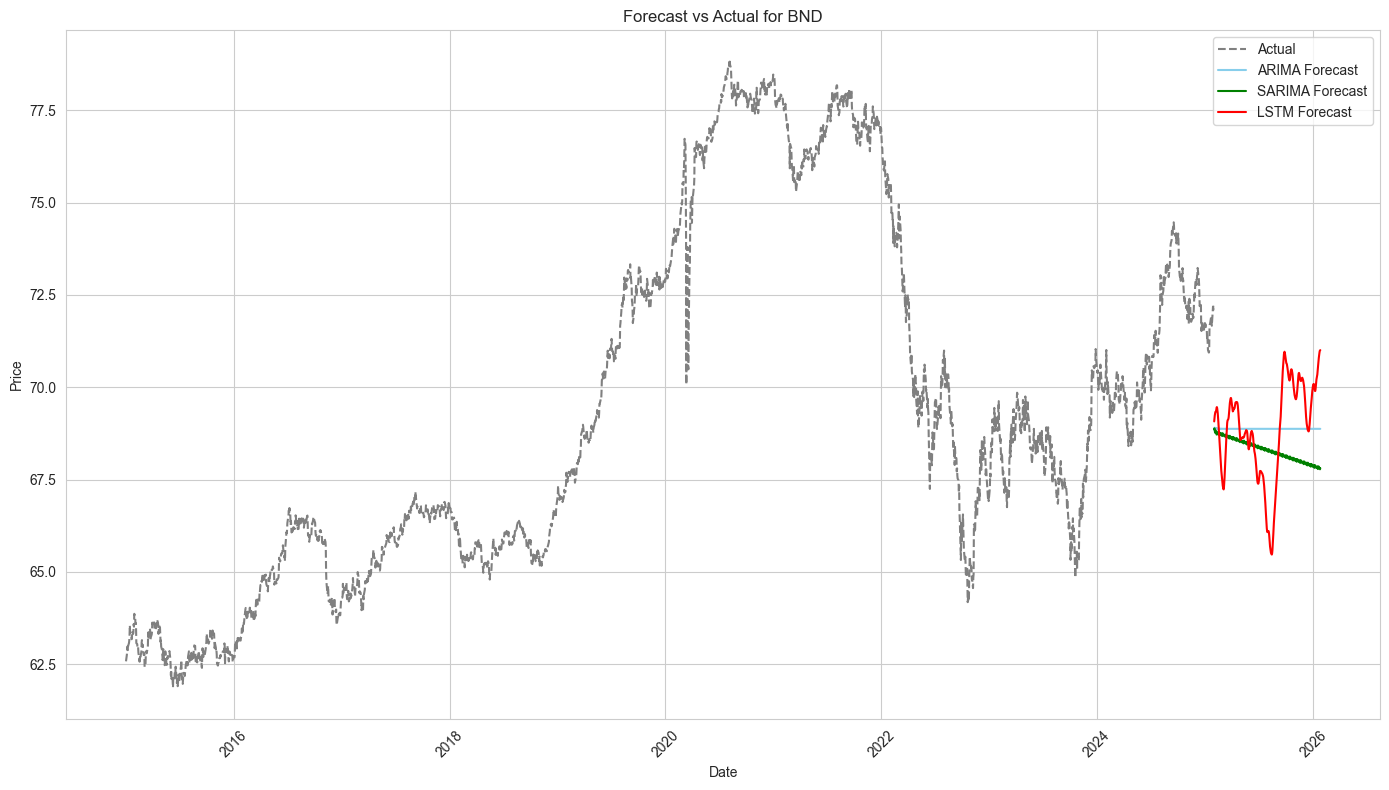


Summary of Model Performance for BND:
ARIMA - MAE: 1.0821, RMSE: 1.3723, MAPE: 1.59%
SARIMA - MAE: 1.2627, RMSE: 1.5331, MAPE: 1.73%
LSTM - MAE: 0.4695, RMSE: 0.5674, MAPE: 2.22%

Best Model for BND based on MAPE: ARIMA



In [41]:

forecast(bnd_data, result_bond,'BND')

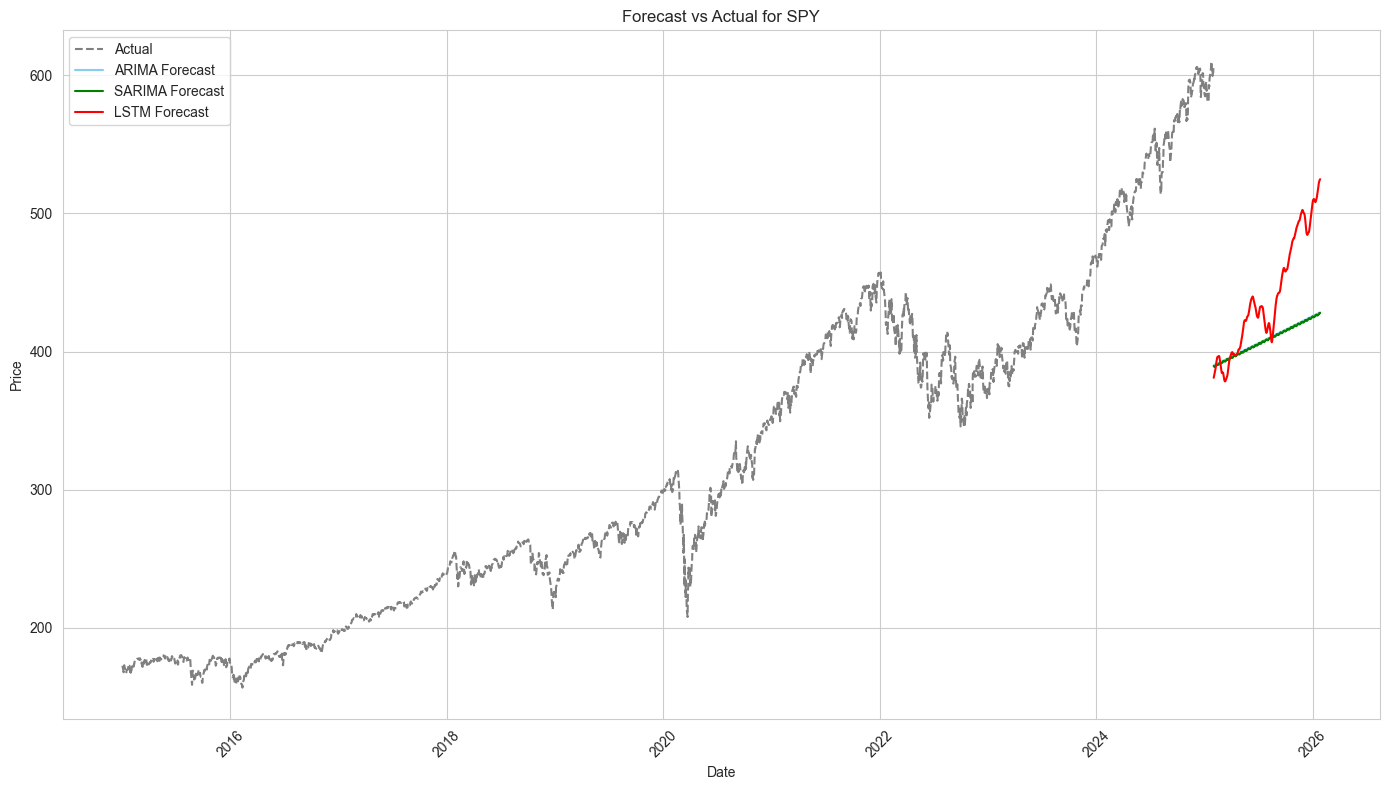


Summary of Model Performance for SPY:
ARIMA - MAE: 42.0314, RMSE: 54.0544, MAPE: 10.01%
SARIMA - MAE: 42.6724, RMSE: 54.6517, MAPE: 10.09%
LSTM - MAE: 10.2234, RMSE: 11.9300, MAPE: 11.04%

Best Model for SPY based on MAPE: ARIMA



In [42]:
forecast(spy_data, result_spy,'SPY')